# Week 3 

## Day 1: Using numbers in Python. 

* Limitations of data types such as integers and floats. 

* Sympy, and other numerical data types. 

## Before we begin

Notice that you can always determine the data type Python is using in an expression with the **type** keyword.

In [1]:
print(type(1.0))
print(type(1.))
print(type(1))

<class 'float'>
<class 'float'>
<class 'int'>


### Some experiments with Python number types. 

We will do some elementary experiments with Python numerical data types, to explore their limitations. 

Let's start with a basic *expansive* process.   Given a number $x$ we will *double* it, 
$$x \longmapsto 2x$$
and then to keep things at a fixed scale, we will subtract whichever integer $k$ it takes so that
$0 \leq 2x - k < 1$.  

What we are doing would sometimes be called *iteration* of the function
$$ f(x) = 2x - \lfloor 2x \rfloor $$

$\lfloor x \rfloor$ is the largest integer less than or equal to $x$, i.e. $f(x)$ is the process
of doubling $x$, then removing the integer part.  $0 \leq f(x) < 1$ always. 

In Python:

In [2]:
def f(x):
    x = 2*x
    while (x >= 1): x = x - 1
    while (x < 0): x = x + 1
    return x

import math as ma

x = ma.pi
print(x)
for i in range(50):
    x = f(x)
    print(i, x)

3.141592653589793
0 0.28318530717958623
1 0.5663706143591725
2 0.13274122871834493
3 0.26548245743668986
4 0.5309649148733797
5 0.061929829746759424
6 0.12385965949351885
7 0.2477193189870377
8 0.4954386379740754
9 0.9908772759481508
10 0.9817545518963016
11 0.9635091037926031
12 0.9270182075852063
13 0.8540364151704125
14 0.708072830340825
15 0.41614566068165004
16 0.8322913213633001
17 0.6645826427266002
18 0.32916528545320034
19 0.6583305709064007
20 0.31666114181280136
21 0.6333222836256027
22 0.26664456725120544
23 0.5332891345024109
24 0.06657826900482178
25 0.13315653800964355
26 0.2663130760192871
27 0.5326261520385742
28 0.06525230407714844
29 0.13050460815429688
30 0.26100921630859375
31 0.5220184326171875
32 0.044036865234375
33 0.08807373046875
34 0.1761474609375
35 0.352294921875
36 0.70458984375
37 0.4091796875
38 0.818359375
39 0.63671875
40 0.2734375
41 0.546875
42 0.09375
43 0.1875
44 0.375
45 0.75
46 0.5
47 0.0
48 0.0
49 0.0


So in less than $47$ iterations, $f$ converts π to $0$.  

* * *

*Fact*: if π was represented accurately, the above sequence should *never* terminate. 

Denote $f(f(f(\cdots f(x) \cdots )))$ by $f^{(n)}(x)$, i.e. applying $f$ $n$-times, iteratively, to $x$.  

*Observation*: The only real numbers $x \in \mathbb R$ such that for some integer $n \in \{0,1,2,3,\cdots\}$ $f^{(n)}(x) = 0$ are:
$$ \{ \frac{p}{2^k} : p \in \mathbb Z, k \in \{0,1,2,3,\cdots\} \}$$
i.e. $x$ has to be a *rational* number, numerator an integer, and denominator a power of $2$. 



Thus for rational numbers like $\frac{1}{3}$, the sequence $f^{(n)}(1/3)$ should never terminate at $0$. 

For rational numbers this sequence turns out to be always *periodic*, for example:
$$ f(1/3) = \lfloor 2/3 \rfloor = 2/3$$
$$ f(2/3) = \lfloor 4/3 \rfloor = 1/3$$
$$ f(1/3) = \lfloor 2/3 \rfloor = 2/3$$
so the sequence $f^{(n)}(1/3)$ is $$1/3, 2/3, 1/3, 2/3, \cdots $$ 

*But* if we make $1/3$ a floating point number, look what happens:

In [3]:
x = 1/3
for i in range(58):
    x = f(x)
    print(i, x)

0 0.6666666666666666
1 0.33333333333333326
2 0.6666666666666665
3 0.33333333333333304
4 0.6666666666666661
5 0.33333333333333215
6 0.6666666666666643
7 0.3333333333333286
8 0.6666666666666572
9 0.3333333333333144
10 0.6666666666666288
11 0.33333333333325754
12 0.6666666666665151
13 0.33333333333303017
14 0.6666666666660603
15 0.3333333333321207
16 0.6666666666642413
17 0.3333333333284827
18 0.6666666666569654
19 0.3333333333139308
20 0.6666666666278616
21 0.3333333332557231
22 0.6666666665114462
23 0.3333333330228925
24 0.666666666045785
25 0.3333333320915699
26 0.6666666641831398
27 0.3333333283662796
28 0.6666666567325592
29 0.3333333134651184
30 0.6666666269302368
31 0.33333325386047363
32 0.6666665077209473
33 0.33333301544189453
34 0.6666660308837891
35 0.3333320617675781
36 0.6666641235351562
37 0.3333282470703125
38 0.666656494140625
39 0.33331298828125
40 0.6666259765625
41 0.333251953125
42 0.66650390625
43 0.3330078125
44 0.666015625
45 0.33203125
46 0.6640625
47 0.328125
48 

This is one of the dangers of floating point numbers.  It can result in computation errors in a suprising array of situations.  These errors tend to be called **round off errors**. 

In cases where you need to perform iterations like this and you are looking for *absolute* precision, Python has various other data types you could consider.  For example, the rational number data type. 

In [4]:
import fractions as frac

x = frac.Fraction(1,17)
print(x)
for i in range(20):
    x = f(x)
    print(i, x)
    

1/17
0 2/17
1 4/17
2 8/17
3 16/17
4 15/17
5 13/17
6 9/17
7 1/17
8 2/17
9 4/17
10 8/17
11 16/17
12 15/17
13 13/17
14 9/17
15 1/17
16 2/17
17 4/17
18 8/17
19 16/17


In [5]:
x = 1
for i in range(100):
    x = x*2
    print(x)

2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536
131072
262144
524288
1048576
2097152
4194304
8388608
16777216
33554432
67108864
134217728
268435456
536870912
1073741824
2147483648
4294967296
8589934592
17179869184
34359738368
68719476736
137438953472
274877906944
549755813888
1099511627776
2199023255552
4398046511104
8796093022208
17592186044416
35184372088832
70368744177664
140737488355328
281474976710656
562949953421312
1125899906842624
2251799813685248
4503599627370496
9007199254740992
18014398509481984
36028797018963968
72057594037927936
144115188075855872
288230376151711744
576460752303423488
1152921504606846976
2305843009213693952
4611686018427387904
9223372036854775808
18446744073709551616
36893488147419103232
73786976294838206464
147573952589676412928
295147905179352825856
590295810358705651712
1180591620717411303424
2361183241434822606848
4722366482869645213696
9444732965739290427392
18889465931478580854784
37778931862957161709568
75557863725914323419136
15111

## Some peculiarities of integers

Python has a few peculiarities relating to integers. We mention a few here. 

* There are two division operations:
  - 1/3  and
  - 1//3
  
Let's see what they do. 

In [6]:
print(1/3) ## is a float
print(type(1/3), "\n")

print(1//3)
print(type(1//3))

0.3333333333333333
<class 'float'> 

0
<class 'int'>


## The difference 

The expression $1/3$ is perhaps closest to what we might expect.  It is a floating-point approximation to the fraction $1/3$. 

The expression $1//3$ is an integer.  It denotes *integer division*.  Precisely, given any integer $n$ and a positive integer $d$ there are unique integers $q, r$ with $0 \leq r < d$ such that

$$ n = qd + r $$

$n$ is called the *numerator*, $d$ the *denominator*, $q$ the *quotient* and $r$ the *remainder*.  

 * The operator $n \% d$ produces $r$.  
 * The operator $n // d$ produces $q$.

In [7]:
def divalg(n,d):
    print(n, "=", n//d, "*", d, "+", n%d)

for i in range(-4, 4):
    divalg(i,4)
    
##   % is usually called the "mod operator", giving r the "remainder". 

-4 = -1 * 4 + 0
-3 = -1 * 4 + 1
-2 = -1 * 4 + 2
-1 = -1 * 4 + 3
0 = 0 * 4 + 0
1 = 0 * 4 + 1
2 = 0 * 4 + 2
3 = 0 * 4 + 3


Now we have $f$ simulated accurately on our computers.  The unfortunate side-effect 
of this is that numbers like $\pi$ are not rational numbers.   Another unfortunate side-effect is that some procedures, even if they work with integers converge towards irrational numbers like $\pi$, which is difficult to approximate with fractions.  For instance, the function

$$ x \longmapsto \frac{x^2+2}{2x}$$

converges to $\sqrt{2}$ on iteration.  This is Newton's method for the polynomial $$x^2 - 2 = 0$$

In [8]:
def f(x):
    return (x**2+2)/(2*x)

x = 1
for i in range(6):
    x = f(x)
    print(x)
print("\n\n")

x = frac.Fraction(1,1)
for i in range(6):
    x = f(x)
    print(x)
print("\n")
print(float(x))

1.5
1.4166666666666667
1.4142156862745099
1.4142135623746899
1.414213562373095
1.414213562373095



3/2
17/12
577/408
665857/470832
886731088897/627013566048
1572584048032918633353217/1111984844349868137938112


1.4142135623730951


There are a variety of ways to further simulate irrational numbers.  One could use arbitrary-precision floating point numbers, but this only pushes off the round-off error problem a little further. 

Let's explore this a little.  The library *mpmath* has arbitrary precision floating point numbers. 

In [9]:
import mpmath as mp

mp.mp.dps = 100
#print(mp.pi)

x = mp.mpf(1.0)
#x = 1.0
print(type(x))
for i in range(12):
    x = f(x)
    print(x)
    

<class 'mpmath.ctx_mp_python.mpf'>
1.5
1.416666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666666667
1.414215686274509803921568627450980392156862745098039215686274509803921568627450980392156862745098039
1.41421356237468991062629557889013491011655962211574404458490501920005437183538926835899004315764434
1.414213562373095048801689623502530243614981925776197428498289498623195824228923621784941836735830357
1.414213562373095048801688724209698078569671875377234001561013133113265255630339978531787161250710475
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641602
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573
1.414213562373095048801688724209698078569671

Floating point numbers are (presented as) numbers of the form $A\cdot 10^B$ where $A$ and $B$ are integers.

For example, to represent the number $$1.0324=10324 \cdot 10^{-4}$$ 
Python would store this as a pair of integers $(10324, -4)$. 

* The first integer, $10324$ is called the *significand*.  
* The second integer $-4$ is called the *exponent*.  
* $10$ is called the *base*.  

Since integers are stored with a fixed amount of system memory 
(typically one $64$-bit or $32$-bit register) they are of 
limited size. This means that floating point numbers have 
limits on what kinds of numbers they can describe. It also means that even the
addition and multiplication operation for floating point numbers are subject to usually small, but sometimes large errors. 

To determine how many decimal-places of precision your Python interface has, we compute $1.0 + 10^k$ for $k$ various negative integers.
On my laptop $k=-15$ is the limit of precision.

In [10]:
for i in range(14, 17):
    print("1.0 + 10^-",i," = ", 1.0 + pow(10, -i), sep='')
    

1.0 + 10^-14 = 1.00000000000001
1.0 + 10^-15 = 1.000000000000001
1.0 + 10^-16 = 1.0


This indicates we have $15$ decimal places of accuracy in our number system.  Technically floating point types are stored as $A \cdot 2^B$ with $A$ and $B$ stored in binary.  It is only when floating point numbers are presented to users as text strings that they are converted to the $A \cdot 10^B$ format.  

We repeat the test again in binary.

In [11]:
for i in range(50, 56):
    print("1.0 + 2^-",i," = ", 1.0 + pow(2, -i), sep='')

1.0 + 2^-50 = 1.0000000000000009
1.0 + 2^-51 = 1.0000000000000004
1.0 + 2^-52 = 1.0000000000000002
1.0 + 2^-53 = 1.0
1.0 + 2^-54 = 1.0
1.0 + 2^-55 = 1.0


This indicates that Python uses (roughly) $52$ bits for the significand and the remaining bits for the sign and exponent.

There are further ideas from *algebra* that allow one to accurately manipulate algebraic expressions
like $$ 1 + 23\pi - \pi^2 + \pi^{201} - 100\pi^{198}.$$
The tools in algebra are called *polynomial rings*, *quotient rings* and *Groebner basis* and we have access to these tools through the **Sympy library**.


In [12]:
import sympy as sp

In [13]:
x = sp.Symbol('x')
f = x**3 + sp.sin(x)
sp.pprint(f)

 3         
x  + sin(x)


In [14]:
print(type(f))

<class 'sympy.core.add.Add'>


In [15]:
g = sp.sin(x) + sp.cos(x)
sp.pprint(g)

sin(x) + cos(x)


In [16]:
sp.simplify(g)

sin(x) + cos(x)

In [17]:
G = g**2
sp.pprint(G)

                 2
(sin(x) + cos(x)) 


In [18]:
G = sp.expand(G)
sp.pprint(G)
G1 = sp.simplify(G)
sp.pprint(G1)

   2                           2   
sin (x) + 2⋅sin(x)⋅cos(x) + cos (x)
sin(2⋅x) + 1


In [19]:
G = sp.simplify(G)
sp.pprint(G)

sin(2⋅x) + 1


In [20]:
p = sp.pi**4 + sp.pi**2 + 1
sp.pprint(p)
p1 = p**3
sp.pprint(p1)
p2 = sp.expand(p1)
sp.pprint(p2)

     2    4
1 + π  + π 
             3
⎛     2    4⎞ 
⎝1 + π  + π ⎠ 
       2      4      6      8      10    12
1 + 3⋅π  + 6⋅π  + 7⋅π  + 6⋅π  + 3⋅π   + π  


In [21]:
sp.pprint(f)

 3         
x  + sin(x)


In [22]:
fp = sp.diff( f, x )
sp.pprint(fp)

   2         
3⋅x  + cos(x)


In [23]:
F = sp.integrate(f, x)
sp.pprint(F)

 4         
x          
── - cos(x)
4          


In [24]:
f = sp.cos(x**2)
sp.pprint(f)

   ⎛ 2⎞
cos⎝x ⎠


In [25]:
F = sp.integrate(f, x)
sp.pprint(F)

              ⎛√2⋅x⎞       
√2⋅√π⋅fresnelc⎜────⎟⋅Γ(1/4)
              ⎝ √π ⎠       
───────────────────────────
          8⋅Γ(5/4)         


In [26]:
## convert to a callable functio
Fc = sp.lambdify(x, F, "mpmath")

In [27]:
## Call it!
Fc(1.2)

mpf('0.9739445540762238703270888161050438615801240483997039217923950730282253753724721779861370060233436194668')

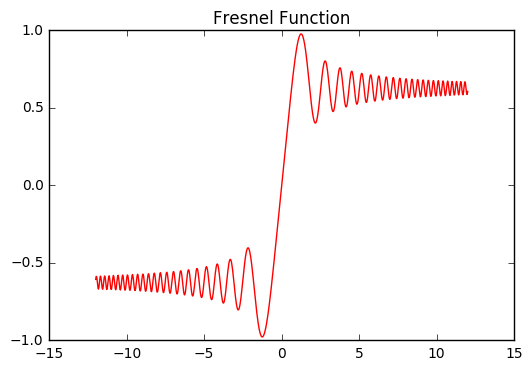

In [34]:
## plot it. (we did not complete this in class)
x = np.linspace(-12.0, 12.0, 800)
y= [Fc(xi) for xi in x]

import matplotlib.pyplot as mpl
mpl.plot(x,y,'r-')
mpl.title("Fresnel Function")